<a href="https://colab.research.google.com/github/elnazqasemi/WWR_Extraction/blob/main/WWR_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 887.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
#Run these two every time to upload broadway csv from your google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/DFWWR/Broadway_East_Cad.csv /content

In [ ]:
import pandas as pd

In [ ]:
# !cp -r /content/Broadway /content/drive/MyDrive

In [ ]:
#To not use your API key again and upload images from Drive
#!cp -r /content/drive/MyDrive/Broadway /content

In [ ]:
from tqdm import tqdm

#Getting the images of each address from CSV file:

In [ ]:

import requests
from PIL import Image, ImageDraw
from io import BytesIO
import IPython.display as display
import os
import pathlib



def get_street_view_image(api_key, location, size="600x300", fov=120, pitch=0, heading=90):
    base_url = "https://maps.googleapis.com/maps/api/streetview"
    params = {
        "size": size,
        "location": location,
        "fov": fov,
        "pitch": pitch,
        "heading": heading,
        "key": api_key
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        raise Exception(f"Error fetching Street View image: {response.status_code}")

# Path to the CSV file
#Copy the csv file in the google colab file section at left bar
#csv_file_path = "/content/Patterson_Park_Neighborhood - Copy.csv"
# csv_file_path = "/content/Broadway_East.csv"
csv_file_path = "/content/Patterson_Park_Neighborhood.csv"
api_key = "AIzaSyCl"# replace it with your google API key

# folder path
# make sure to define a "new folder" in files
#save_folder_path = "/content/Untitled Folder"
#save_folder_path = "/content/Broadway"
save_folder_path = "/content/Patterson_Park"
# Open and read the CSV file
# ALTERNATIVE WITH PANDAS
df = pd.read_csv(csv_file_path)
for i, row in tqdm(df.iterrows()):
  location = row['Address']
  building_id = row['Address']
  # Create a filename using building ID and street name
  filename = f"{building_id}.jpg"
  output_path = os.path.join(save_folder_path, filename)

  if os.path.exists(output_path):
    continue

  try:
    image = get_street_view_image(api_key, location)
    image.save(output_path)
    #Display
    # display.display(image)
  except Exception as e:
    print(e)


# with open(csv_file_path, mode='r', encoding='utf-8') as file:
#     reader = csv.DictReader(file)

#     for row in reader:
#         location = row['Address']
#         # Extract building ID and street name
#         building_id = row['Address']


#         try:
#             image = get_street_view_image(api_key, location)
#             # Create a filename using building ID and street name
#             filename = f"{building_id}.jpg"
#             image.save(os.path.join(save_folder_path, filename))
#             #Display
#             display.display(image)
#         except Exception as e:
#             print(e)


In [ ]:
!cp -r /content/Patterson_Park /content/drive/MyDrive

In [ ]:
# import cv2
# import numpy as np

In [ ]:

# # Convert the image to binary
# image_bw = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
# _, image_bw = cv2.threshold(image_bw, 127, 255, cv2.THRESH_BINARY)

# # Display the binary image
# display.display(Image.fromarray(image_bw))

# Detecting Buildings in each address

In [ ]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# predictions = detector(
#     image,
#     candidate_labels=["building"],
# )
# buildings = []
# for p in predictions:
#     bb = p["box"]
#     xmin = bb['xmin']
#     ymin = bb['ymin']
#     xmax = bb['xmax']
#     ymax = bb['ymax']
#     buildings.append(image.crop((xmin, ymin, xmax, ymax)))

In [ ]:

# List all image files in the folder
from pathlib import Path

image_files = [f for f in os.listdir(save_folder_path) if f.endswith('.jpg')]

buildings = {}

for image_file in tqdm(image_files):
    # Load the image
    image_path = os.path.join(save_folder_path, image_file)
    with Image.open(image_path) as image:
        # Apply the detector on the image
        predictions = detector(
            image,
            candidate_labels=["building"],
        )
        buildings[image_path] = []

        # Extract buildings from each image
        for p in predictions:
            bb = p["box"]
            xmin = bb['xmin']
            ymin = bb['ymin']
            xmax = bb['xmax']
            ymax = bb['ymax']
            buildings[image_path].append(image.crop((xmin, ymin, xmax, ymax)))


# you can comment following parts in case of large input
#print(f"number of images: {len(buildings.keys())}")
#number of buildings detected in each image
# for image, building in buildings.items():
#     print(f"{Path(image).stem}: {len(building)}")

100%|██████████| 960/960 [36:20<00:00,  2.27s/it]


In [ ]:
# buildings[][0]

[<PIL.Image.Image image mode=RGB size=278x287>,
 <PIL.Image.Image image mode=RGB size=139x233>]

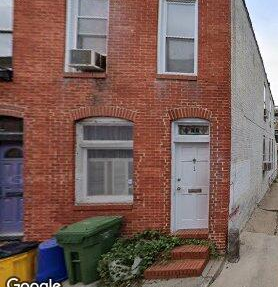

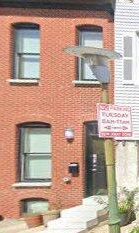

In [ ]:

# import IPython.display as Display
# for building in buildings:
#     Display.display(building)

#Detecting Windows in Images:

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="2nDoXqG")#Change it your API key
project = rf.workspace().project("window-detection-xowg3")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# im = buildings[0]
# im.save('temp_image.jpg')
# result = model.predict('temp_image.jpg', confidence=30, overlap=30).json()
# window_area = sum([int(w['width'])*int(w['height'])for w in result['predictions']], 0)
# total_area = im.width*im.height
# window_area, total_area, window_area/total_area

(18235, 82008, 0.2223563554775144)

In [ ]:

# buildings_ratio: Dict[str, List[dict]]
from collections import OrderedDict
buildings_ratio = OrderedDict()
for image_path in tqdm(buildings.keys()):
    address = Path(image_path).stem
    total_window_area = 0
    total_facade_area = 0
    for im in buildings[image_path]:
      im.save('temp_image.jpg')
      result = model.predict('temp_image.jpg', confidence=30, overlap=30).json()
      window_area = sum([int(w['width'])*int(w['height']) for w in result['predictions']], 0)
      facade_area = im.width * im.height
      # window_to_total_ratio = window_area / total_area if total_area > 0 else 0

      # ratio_info = {
      #  'total_window_area': total_window_area,
      #  'window_area': window_area,
      #  'total_area': facade_area,
      #   'WWR': window_area/facade_area,
      # }

      # if address not in buildings_ratio:
      #   buildings_ratio[address] = []
      # buildings_ratio[address].append(ratio_info)
      # buildings_ratio[address] = window_area/total_area

      total_window_area += window_area
      total_facade_area += facade_area


    # if total_facade_area > 0:
    #     buildings_ratio[address] = {
    #         'window_area': total_window_area,
    #         'facade_area': total_facade_area,
    #         'WWR': total_window_area / total_facade_area,
    #     }
    # else:
    #     buildings_ratio[address] = {
    #         'window_area': total_window_area,
    #         'facade_area': total_facade_area,
    #         'WWR': 0,  # Or some other default value
    #     }

    buildings_ratio[address] = {
        'window_area': total_window_area,
        'facade_area': total_facade_area,
        'WWR': total_window_area/total_facade_area  if total_facade_area > 0 else 0,
    }

# for image_path in buildings.keys():
#   address = Path(image_path).stem
#   print(f"{address}: {buildings_ratio[address]}")

 91%|█████████▏| 878/960 [11:41<01:05,  1.25it/s]


HTTPError: 403 Client Error: Forbidden for url: https://detect.roboflow.com/window-detection-xowg3/1?api_key=2nDoXqGj8nSW0mDFSKRh&name=YOUR_IMAGE.jpg&overlap=30&confidence=30&stroke=1&labels=false&format=json

Saving to the existing CSV file:

In [ ]:
updated_csv_file_path = '/content/Patterson_Park_Neighborhood.csv'  # Path for the updated CSV file

# df = pd.read_csv(csv_file_path)
# df.set_index('Address', inplace=True)
new_df = pd.DataFrame({"Address": list(buildings_ratio.keys()), "WWR": [info["WWR"] for info in buildings_ratio.values()], "window_area": [info["window_area"] for info in buildings_ratio.values()]})
df_out = df.merge(new_df, how='left', on='Address')
df_out.to_csv(updated_csv_file_path)
# # Read the original CSV file and add new data
# with open(csv_file_path, mode='r', encoding='utf-8') as infile, \
#      open(updated_csv_file_path, mode='w', encoding='utf-8', newline='') as outfile:
#     reader = csv.DictReader(infile)
#     fieldnames = reader.fieldnames + ['window_area', 'total_area', 'window_to_total_ratio']
#     writer = csv.DictWriter(outfile, fieldnames=fieldnames)

#     writer.writeheader()
#     for row, result in zip(reader, results):
#         row.update(result)
#         writer.writerow(row)
# df_out

In case of "No Building detected":


In [ ]:
!cp -r /content/drive/MyDrive/DFWWR/Broadway_East.csv /content

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Broadway_East.csv')


column_name = 'WWR'

# Replace 0
df[column_name] = df[column_name].replace(0, 'No building detected or tree in front of the building')

df.to_csv('/content/Broadway_East.csv', index=False)


# Move to your Drive:

In [ ]:
!cp -r //content/Broadway_East.csv /content/drive/MyDrive/DFWWR

Total Broadway Buildings:640 /
Total Patterson Park Neighborhood: 960

In [ ]:
!cp -r //content/df.csv /content/drive/MyDrive/DFWWR

# Four facade WWR(Dividing addresses into East, and North groups)

In [ ]:
df = pd.read_csv('/content/Broadway_East_Cad.csv')

# Function to assign groups based on 'E' or 'N'
def assign_group(address):
    if ' E ' in address:
        return 'E'
    elif ' N ' in address:
        return 'N'
    else:
        return 'Other'


# If you want separate columns for 'Group_E' and 'Group_N'
df['Group_E'] = df['Address'].apply(lambda x: 'E' if ' E ' in x else 'Other')
df['Group_N'] = df['Address'].apply(lambda x: 'N' if ' N ' in x else 'Other')



In [ ]:
# Save the EN separated to a new CSV file
df.to_csv('/content/dfEN.csv', index=False)

In [ ]:
!cp -r /content/drive/MyDrive/DFWWR/dfEN.csv /content

In [ ]:
#Is it really necessary to do this?
df = pd.read_csv('/content/dfEN.csv')

# Function to replace values
def replace_values(row):
    if row['Group_E'] == ' E ':
        return row['replacement_column']
    else:
        return row['column_to_replace']

# Apply the function to create a new column or overwrite the existing one
df['new_column'] = df.apply(replace_values, axis=1)

# Display the updated DataFrame
print(df)


In [ ]:
!cp -r //content/dfEN.csv /content/drive/MyDrive/DFWWR

# Getting the Latitude, and longitude of each address:

In [ ]:


df = pd.read_csv('/content/dfEN.csv')

df['Address'] = df['Address'].str.replace(", Baltimore, Maryland", "")


df.to_csv('/content/dfEN.csv', index=False)





In [ ]:
!cp -r //content/dfENlonlat.csv /content/drive/MyDrive/DFWWR

## **residual graph:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Broadway_East_Cad.csv')

df = df.dropna(subset=['Cad_WWR'])
# Remove rows with empty strings in the 'Cad_WWR' column
df = df[df['Cad_WWR'] != ' ']
# Convert the 'Cad_WWR' column to float
df['Cad_WWR'] = df['Cad_WWR'].astype(float)


In [ ]:
df.head(20)

,Unnamed: 0,Address,Building Use,Living Sq. Ft,Exterior Wall,Heating Type,Cooling Type,BuildingType,Stories,yearBuilt,Web-source,WWR,window_area,Cad_WWR,
0,0,"1201 N Gay St, Baltimore, Maryland",NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,www.redfin.com/MD/Baltimore/1201-N-Gay-St-2121...,0.63314724,84037,0.19,NaN
3,3,"1212 N Montford Ave, Baltimore, Maryland",['Residential'],['674'],['Brick'],['Hot Air'],NaN,Townhouse,1.0,1909.0,www.redfin.com/MD/Baltimore/1212-N-Montford-Av...,0.071534927,3363,0.13,NaN
7,7,"1219 N Gay St, Baltimore, Maryland",['Residential'],['320'],['Stucco'],['Hot Water'],NaN,Townhouse,2.0,1920.0,www.redfin.com/MD/Baltimore/1219-N-Gay-St-2121...,0.131401641,14666,0.13,NaN
15,15,"1229 N Gay St, Baltimore, Maryland",['Residential'],['684'],['Brick'],['Hot Air'],NaN,Townhouse,2.0,1920.0,www.redfin.com/MD/Baltimore/1229-N-Gay-St-2121...,0.201313928,19918,0.18,NaN
18,18,"1253 N Broadway, Baltimore, Maryland",['Residential'],['420'],['Brick'],['Hot Air'],NaN,Townhouse,2.0,1920.0,www.redfin.com/MD/Baltimore/1253-N-Broadway-21...,0.208775556,61413,0.19,NaN
32,32,"1317 N Montford Ave, Baltimore, Maryland",['Residential'],['629'],['Brick'],['Radiant Hot Water'],NaN,Townhouse,1.0,1910.0,www.redfin.com/MD/Baltimore/1317-N-Montford-Av...,0.076958106,3887,0.15,NaN
33,33,"1317 N Washington St, Baltimore, Maryland",['Residential'],['598'],['Brick'],['Radiant Hot Water'],NaN,Townhouse,2.0,1915.0,www.redfin.com/MD/Baltimore/1317-N-Washington-...,0.149162011,9612,0.15,NaN
34,34,"1318 N Milton Ave, Baltimore, Maryland",['Residential'],['762'],['Brick'],['Radiant Hot Water'],NaN,Townhouse,1.0,1890.0,www.redfin.com/MD/Baltimore/1318-N-Milton-Ave-...,0.070885961,7829,0.14,NaN
273,273,"1725 E Federal St, Baltimore, Maryland",['Residential'],['648'],['Brick'],['Radiant Hot Water'],NaN,Townhouse,2.0,1905.0,www.redfin.com/MD/Baltimore/1725-E-Federal-St-...,0.075018561,7275,0.17,NaN
353,353,"1812 E Federal St, Baltimore, Maryland",['Residential'],['585'],['Brick'],['Hot Air'],NaN,Townhouse,2.0,1903.0,www.redfin.com/MD/Baltimore/1812-E-Federal-St-...,0.945701358,25916,0.15,NaN


In [ ]:
df.shape

(25, 15)

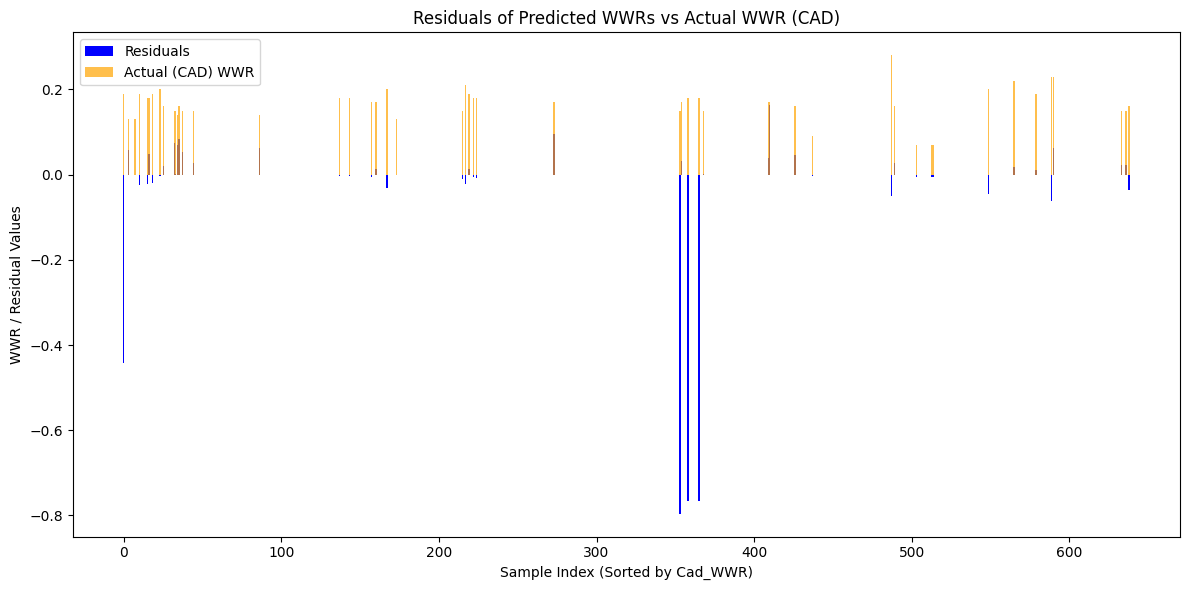

In [ ]:
# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['Cad_WWR', 'WWR'])

df["Residual"] = df["Cad_WWR"] - df["WWR"]

df_sorted = df.sort_values(by="Cad_WWR")

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    df_sorted.index,
    df_sorted["Residual"],
    color="blue",
    label="Residuals"
)

ax.bar(
    df_sorted.index,
    df_sorted["Cad_WWR"],
    color="orange",
    alpha=0.7,
    label="Actual (CAD) WWR"
)

ax.set_xlabel("Sample Index (Sorted by Cad_WWR)")
ax.set_ylabel("WWR / Residual Values")
ax.set_title("Residuals of Predicted WWRs vs Actual WWR (CAD)")
ax.legend()

plt.tight_layout()
plt.show()



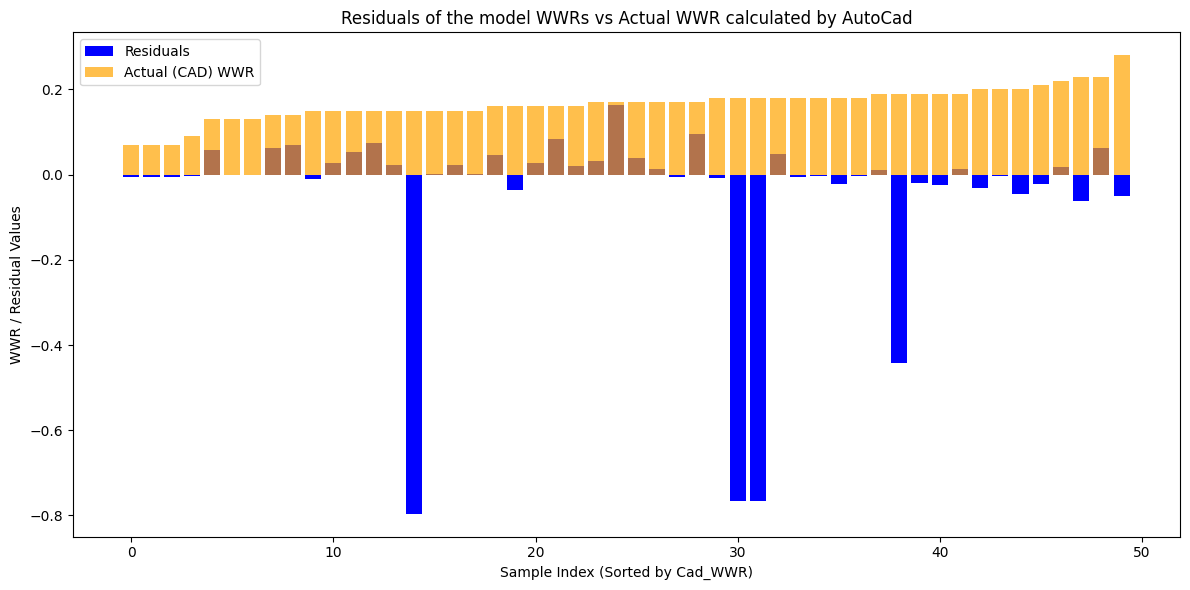

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

df['Residual'] = df['Cad_WWR'] - df['WWR']

df_sorted = df.sort_values(by='Cad_WWR').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.8

ax.bar(
    df_sorted.index,
    df_sorted['Residual'],
    color='blue',
    width=bar_width,
    label='Residuals'
)

ax.bar(
    df_sorted.index,
    df_sorted['Cad_WWR'],
    color='orange',
    width=bar_width,
    alpha=0.7,
    label='Actual (CAD) WWR'
)

ax.set_xlabel("Sample Index (Sorted by Cad_WWR)")
ax.set_ylabel("WWR / Residual Values")
ax.set_title("Residuals of the model WWRs vs Actual WWR calculated by AutoCad")
ax.legend()

plt.tight_layout()
plt.show()


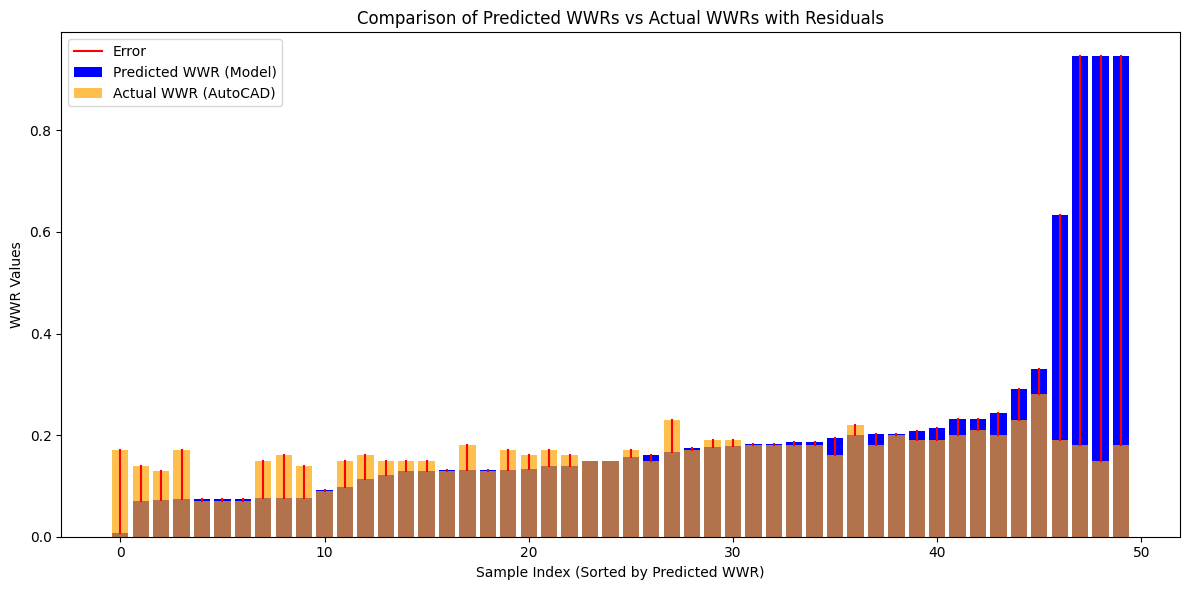

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

df['Residual'] = df['Cad_WWR'] - df['WWR']

df_sorted = df.sort_values(by='WWR').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.8

ax.bar(
    df_sorted.index,
    df_sorted['WWR'],
    color='blue',
    width=bar_width,
    label='Predicted WWR (Model)'
)

ax.bar(
    df_sorted.index,
    df_sorted['Cad_WWR'],
    color='orange',
    width=bar_width,
    alpha=0.7,
    label='Actual WWR (AutoCAD)'
)


for i in range(len(df_sorted)):
    x = df_sorted.index[i]
    predicted = df_sorted['WWR'].iloc[i]
    actual = df_sorted['Cad_WWR'].iloc[i]
    ax.plot([x, x], [predicted, actual], color='red', linewidth=1.5, label='Error' if i == 0 else "")

ax.set_xlabel("Sample Index (Sorted by Predicted WWR)")
ax.set_ylabel("WWR Values")
ax.set_title("Comparison of Predicted WWRs vs Actual WWRs with Residuals")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


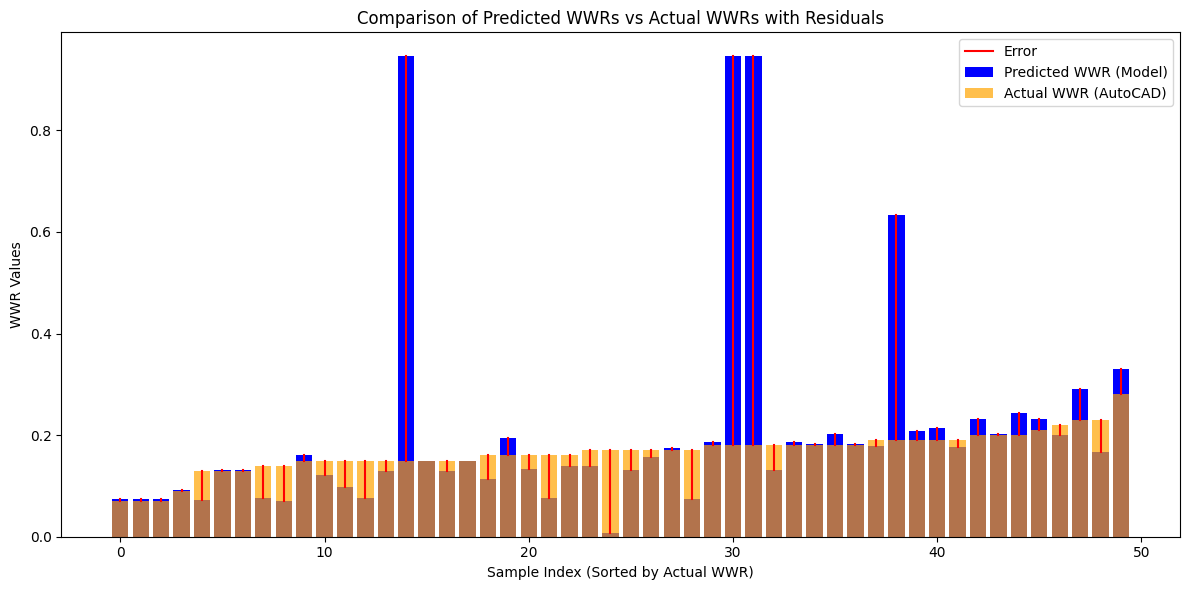

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Residual'] = df['Cad_WWR'] - df['WWR']

# Sort by 'Cad_WWR' (Actual WWR) and reset index to ensure no gaps
df_sorted = df.sort_values(by='Cad_WWR').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width
bar_width = 0.8


ax.bar(
    df_sorted.index,
    df_sorted['WWR'],
    color='blue',
    width=bar_width,
    label='Predicted WWR (Model)'
)


ax.bar(
    df_sorted.index,
    df_sorted['Cad_WWR'],
    color='orange',
    width=bar_width,
    alpha=0.7,
    label='Actual WWR (AutoCAD)'
)

for i in range(len(df_sorted)):
    x = df_sorted.index[i]
    predicted = df_sorted['WWR'].iloc[i]
    actual = df_sorted['Cad_WWR'].iloc[i]
    ax.plot([x, x], [predicted, actual], color='red', linewidth=1.5, label='Error' if i == 0 else "")

# Customize the plot
ax.set_xlabel("Sample Index (Sorted by Actual WWR)")
ax.set_ylabel("WWR Values")
ax.set_title("Comparison of Predicted WWRs vs Actual WWRs with Residuals")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


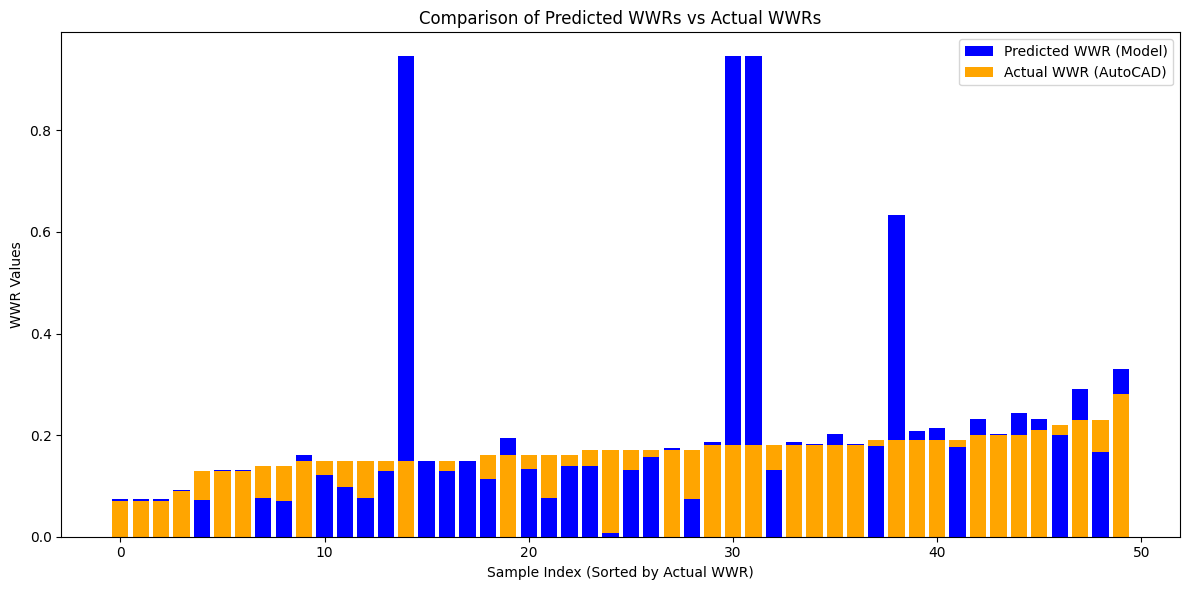

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Drop rows where 'Cad_WWR' is NaN or empty strings
df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

df_sorted = df.sort_values(by='Cad_WWR').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width
bar_width = 0.8

for i in range(len(df_sorted)):
    x = df_sorted.index[i]
    predicted = df_sorted['WWR'].iloc[i]
    actual = df_sorted['Cad_WWR'].iloc[i]

    # Plot the shorter bar first
    if predicted >= actual:
        ax.bar(x, predicted, color='blue', width=bar_width, label='Predicted WWR (Model)' if i == 0 else "")
        ax.bar(x, actual, color='orange', width=bar_width, label='Actual WWR (AutoCAD)' if i == 0 else "")
    else:
        ax.bar(x, actual, color='orange', width=bar_width, label='Actual WWR (AutoCAD)' if i == 0 else "")
        ax.bar(x, predicted, color='blue', width=bar_width, label='Predicted WWR (Model)' if i == 0 else "")

# Customize the plot
ax.set_xlabel("Sample Index (Sorted by Actual WWR)")
ax.set_ylabel("WWR Values")
ax.set_title("Comparison of Predicted WWRs vs Actual WWRs")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


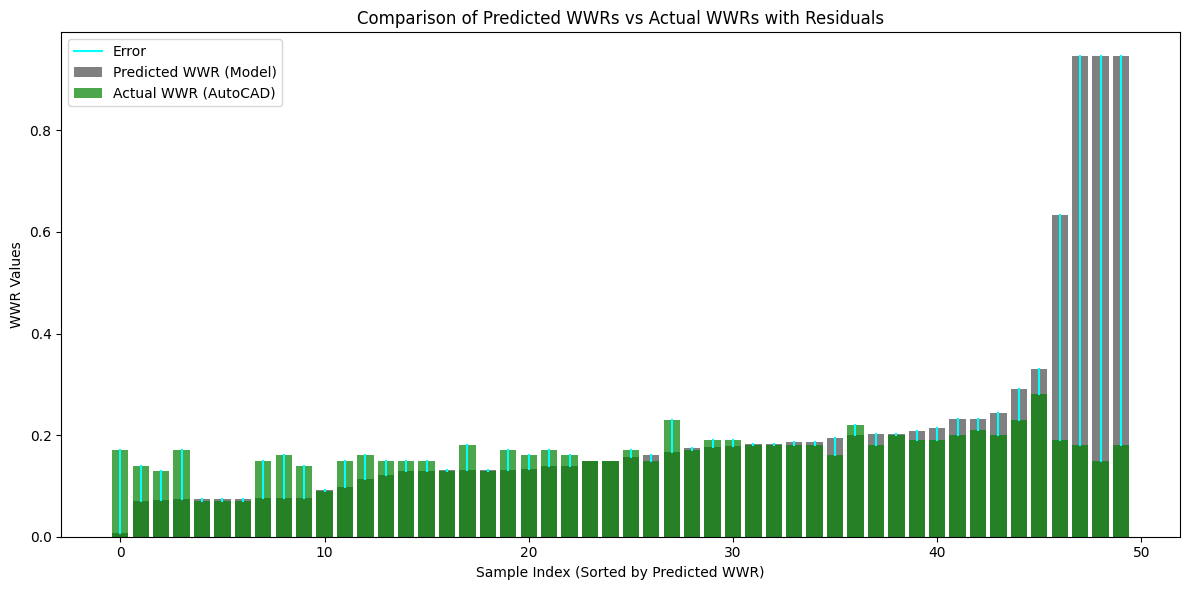

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Drop rows where 'Cad_WWR' is NaN or empty strings
df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Residual'] = df['Cad_WWR'] - df['WWR']

# Sort by 'WWR' (Predicted WWR) and reset index to ensure no gaps
df_sorted = df.sort_values(by='WWR').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width
bar_width = 0.8

# Plot predicted WWRs as bars
ax.bar(
    df_sorted.index,
    df_sorted['WWR'],
    color='gray',
    width=bar_width,
    label='Predicted WWR (Model)'
)

# Overlay the actual values (CAD WWR) as green bars on the same position
ax.bar(
    df_sorted.index,
    df_sorted['Cad_WWR'],
    color='green',
    width=bar_width,
    alpha=0.7,
    label='Actual WWR (AutoCAD)'
)

# Add error lines to represent residuals
for i in range(len(df_sorted)):
    x = df_sorted.index[i]
    predicted = df_sorted['WWR'].iloc[i]
    actual = df_sorted['Cad_WWR'].iloc[i]
    ax.plot([x, x], [predicted, actual], color='cyan', linewidth=1.5, label='Error' if i == 0 else "")

# Customize the plot
ax.set_xlabel("Sample Index (Sorted by Predicted WWR)")
ax.set_ylabel("WWR Values")
ax.set_title("Comparison of Predicted WWRs vs Actual WWRs with Residuals")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


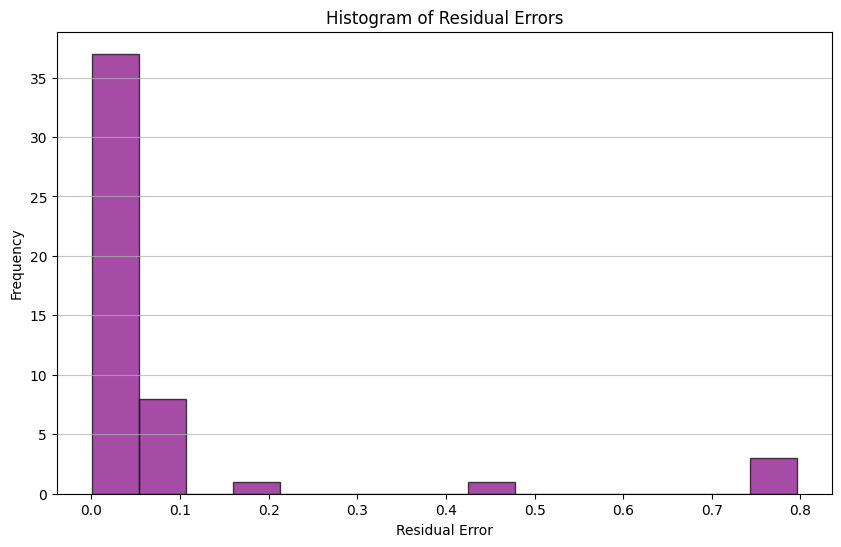

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Drop rows where 'Cad_WWR' is NaN or empty strings
df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Error'] = abs(df['Cad_WWR'] - df['WWR'])

# Plotting Residual Errors as a Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Error'], bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Histogram of Residual Errors")
plt.grid(axis='y', alpha=0.75)
plt.show()


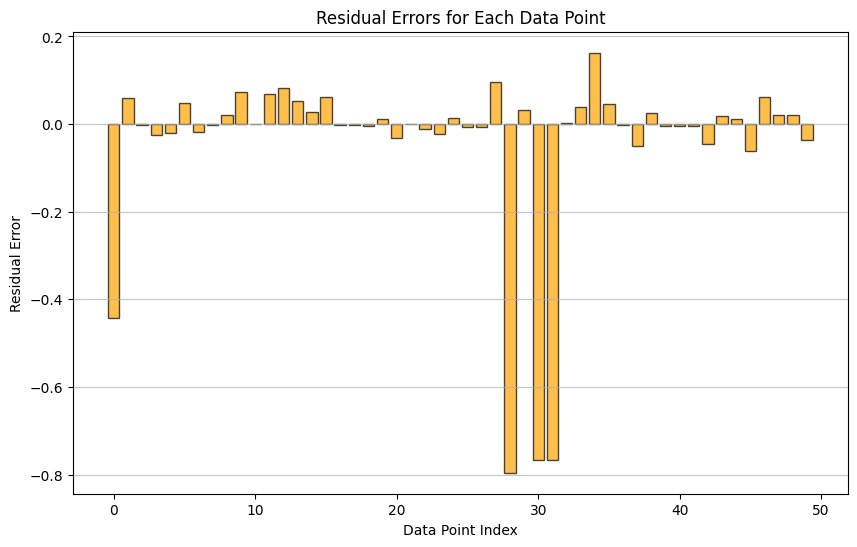

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Drop rows where 'Cad_WWR' is NaN or empty strings
df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Error'] = df['Cad_WWR'] - df['WWR']

# Plotting Residual Errors for Each Point
plt.figure(figsize=(10, 6))
plt.bar(range(len(df['Error'])), df['Error'], color='orange', alpha=0.7, edgecolor='black')
plt.xlabel("Data Point Index")
plt.ylabel("Residual Error")
plt.title("Residual Errors for Each Data Point")
plt.grid(axis='y', alpha=0.75)
plt.show()


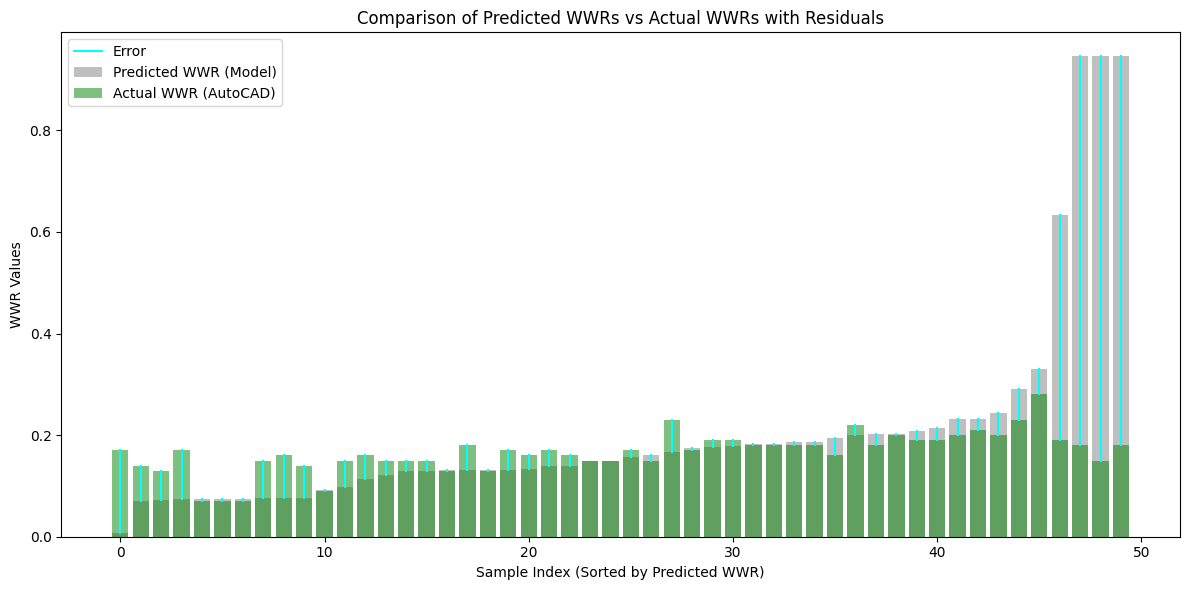

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Drop rows where 'Cad_WWR' is NaN or empty strings
df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Residual'] = df['Cad_WWR'] - df['WWR']

# Sort by 'WWR' (Predicted WWR) and reset index to ensure no gaps
df_sorted = df.sort_values(by='WWR').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width
bar_width = 0.8

# Plot predicted WWRs as bars
ax.bar(
    df_sorted.index,
    df_sorted['WWR'],
    color='gray',
    width=bar_width,
    alpha=0.5,
    label='Predicted WWR (Model)'
)

# Overlay the actual values (CAD WWR) as green bars on the same position
ax.bar(
    df_sorted.index,
    df_sorted['Cad_WWR'],
    color='green',
    width=bar_width,
    alpha=0.5,
    label='Actual WWR (AutoCAD)'
)

# Add error lines to represent residuals
for i in range(len(df_sorted)):
    x = df_sorted.index[i]
    predicted = df_sorted['WWR'].iloc[i]
    actual = df_sorted['Cad_WWR'].iloc[i]
    ax.plot([x, x], [predicted, actual], color='cyan', linewidth=1.5, label='Error' if i == 0 else "")

# Customize the plot
ax.set_xlabel("Sample Index (Sorted by Predicted WWR)")
ax.set_ylabel("WWR Values")
ax.set_title("Comparison of Predicted WWRs vs Actual WWRs with Residuals")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


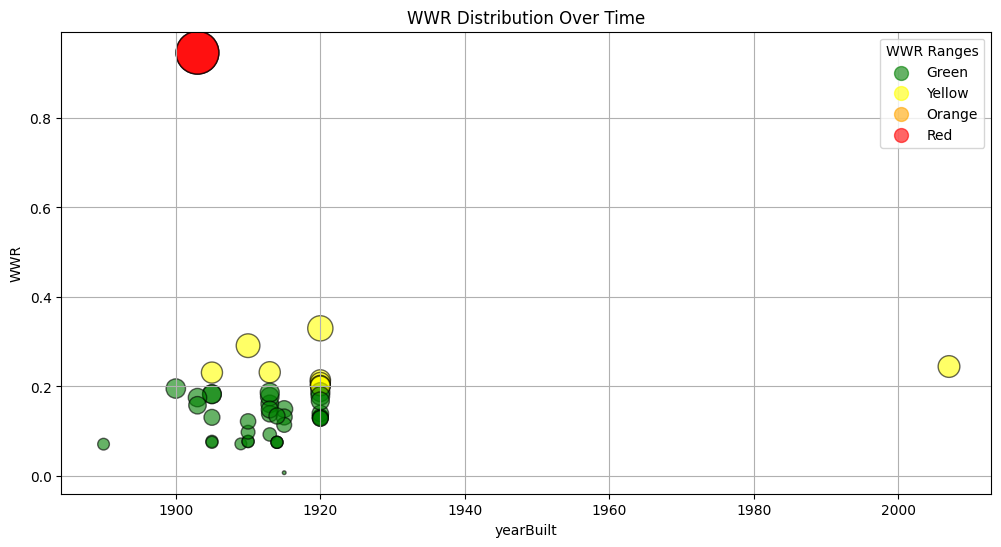

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed or where Cad_WWR is not available
df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Residual'] = df['Cad_WWR'] - df['WWR']

df_sorted = df.sort_values(by='Cad_WWR').reset_index(drop=True)

df = df.dropna(subset=['yearBuilt', 'WWR'])  # Drop missing values
X = df[['yearBuilt', 'WWR']]

def categorize_wwr(wwr):
    if wwr < 0.2:
        return 'Green'  # Low WWR
    elif wwr < 0.4:
        return 'Yellow'  # Medium-Low WWR
    elif wwr < 0.6:
        return 'Orange'  # Medium-High WWR
    else:
        return 'Red'  # High WWR

df['Category'] = df['WWR'].apply(categorize_wwr)

# Color mapping
color_map = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}
df['Color'] = df['Category'].map(color_map)

df['Size'] = df['WWR'] * 1000  # Adjust scale for better visualization

plt.figure(figsize=(12, 6))
plt.scatter(df['yearBuilt'], df['WWR'], s=df['Size'], c=df['Color'], alpha=0.6, edgecolors='black')

for category, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=category)

plt.xlabel('yearBuilt')
plt.ylabel('WWR')
plt.title('WWR Distribution Over Time')
plt.legend(title="WWR Ranges")
plt.grid(True)

# Show the plot
plt.show()

# Save clustered data
df.to_csv('wwr_clustered.csv', index=False)


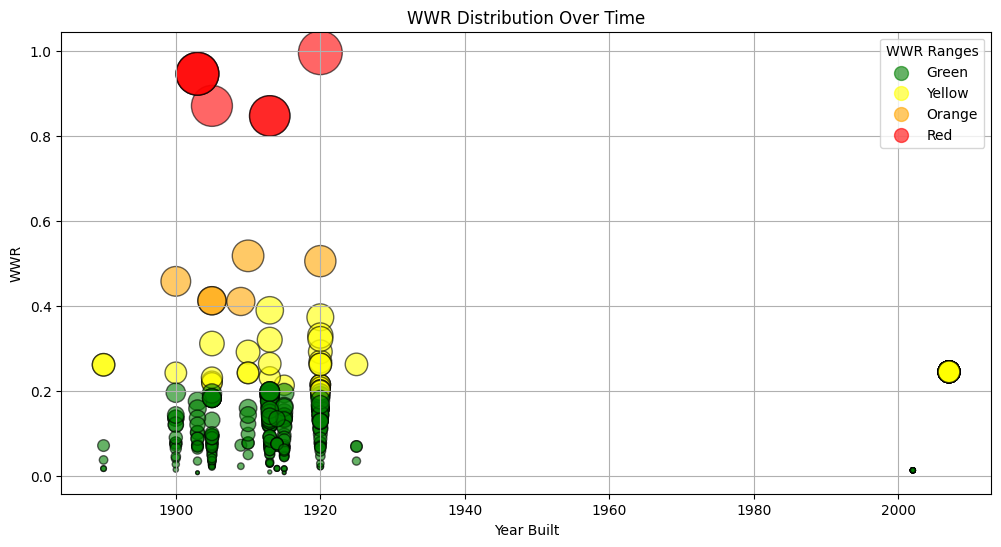

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['WWR'])
df = df[df['WWR'] > 0]

df['Residual'] = df['Cad_WWR'] - df['WWR']

df_sorted = df.sort_values(by='Cad_WWR', na_position='last').reset_index(drop=True)

# Extract relevant features
df = df.dropna(subset=['yearBuilt', 'WWR'])  # Drop missing values for visualization
X = df[['yearBuilt', 'WWR']]

def categorize_wwr(wwr):
    if wwr < 0.2:
        return 'Green'  # Low WWR
    elif wwr < 0.4:
        return 'Yellow'  # Medium-Low WWR
    elif wwr < 0.6:
        return 'Orange'  # Medium-High WWR
    else:
        return 'Red'  # High WWR

df['Category'] = df['WWR'].apply(categorize_wwr)

color_map = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}
df['Color'] = df['Category'].map(color_map)

df['Size'] = df['WWR'] * 1000  # Adjust scale for better visualization

# Create the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(df['yearBuilt'], df['WWR'], s=df['Size'], c=df['Color'], alpha=0.6, edgecolors='black')

# Add legend
for category, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=category)

plt.xlabel('Year Built')
plt.ylabel('WWR')
plt.title('WWR Distribution Over Time')
plt.legend(title="WWR Ranges")
plt.grid(True)

# Show the plot
plt.show()

# Save clustered data
df.to_csv('wwr_clustered.csv', index=False)


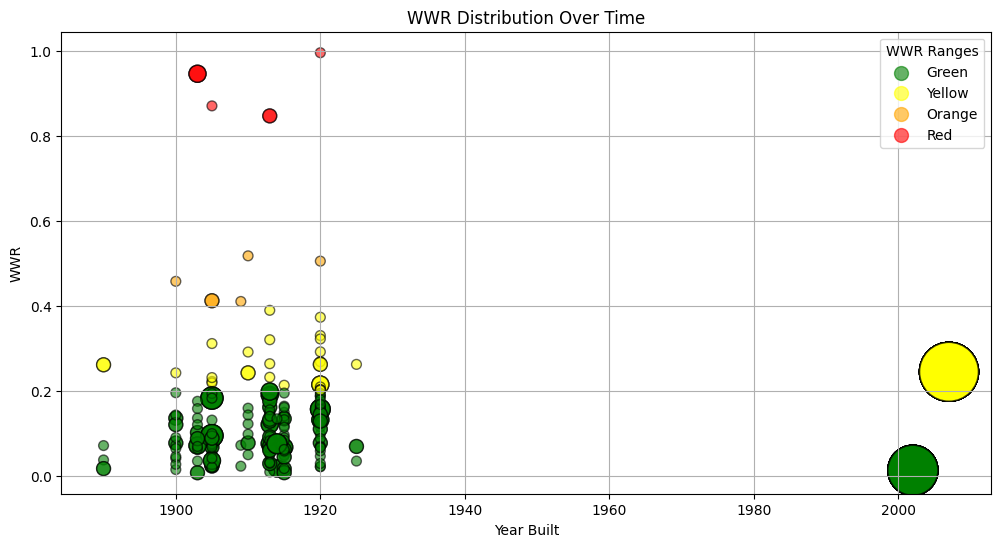

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed for WWR
df = df.dropna(subset=['WWR'])
df = df[df['WWR'] > 0]

# Calculate residuals where Cad_WWR is available
df['Residual'] = df['Cad_WWR'] - df['WWR']

# Sort by 'Cad_WWR' where available and reset index
df_sorted = df.sort_values(by='Cad_WWR', na_position='last').reset_index(drop=True)

# Extract relevant features
df = df.dropna(subset=['yearBuilt', 'WWR'])  # Drop missing values for visualization
X = df[['yearBuilt', 'WWR']]

# Categorizing WWR into ranges
def categorize_wwr(wwr):
    if wwr < 0.2:
        return 'Green'  # Low WWR
    elif wwr < 0.4:
        return 'Yellow'  # Medium-Low WWR
    elif wwr < 0.6:
        return 'Orange'  # Medium-High WWR
    else:
        return 'Red'  # High WWR

df['Category'] = df['WWR'].apply(categorize_wwr)

# Color mapping
color_map = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}
df['Color'] = df['Category'].map(color_map)

# Compute abundance by counting occurrences of (yearBuilt, WWR)
df['Count'] = df.groupby(['yearBuilt', 'WWR'])['WWR'].transform('count')

# Define bubble sizes based on abundance
df['Size'] = df['Count'] * 50  # Adjust scale for better visualization

# Create the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(df['yearBuilt'], df['WWR'], s=df['Size'], c=df['Color'], alpha=0.6, edgecolors='black')

# Add legend
for category, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=category)

plt.xlabel('Year Built')
plt.ylabel('WWR')
plt.title('WWR Distribution Over Time')
plt.legend(title="WWR Ranges")
plt.grid(True)

# Show the plot
plt.show()

# Save clustered data
df.to_csv('wwr_clustered.csv', index=False)

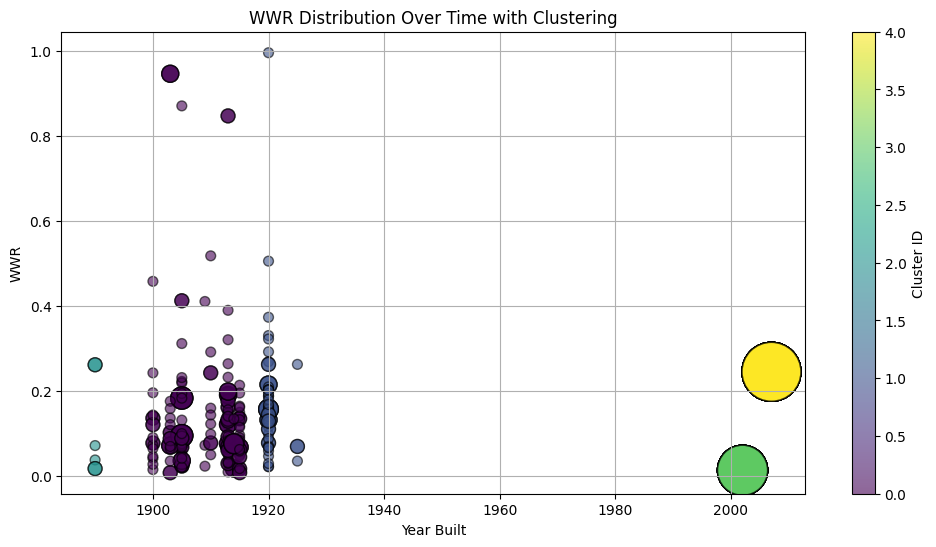

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

# Convert 'Cad_WWR' and 'WWR' to numeric, coercing errors to NaN
df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

# Drop rows where conversion failed for WWR
df = df.dropna(subset=['WWR'])
df = df[df['WWR'] > 0]

# Calculate residuals where Cad_WWR is available
df['Residual'] = df['Cad_WWR'] - df['WWR']

# Sort by 'Cad_WWR' where available and reset index
df_sorted = df.sort_values(by='Cad_WWR', na_position='last').reset_index(drop=True)

# Extract relevant features
df = df.dropna(subset=['yearBuilt', 'WWR'])  # Drop missing values for visualization
X = df[['yearBuilt', 'WWR']]

# Apply DBSCAN clustering to group close data points
clustering = DBSCAN(eps=5, min_samples=3).fit(X)
df['Cluster'] = clustering.labels_

# Categorizing WWR into ranges
def categorize_wwr(wwr):
    if wwr < 0.2:
        return 'Green'  # Low WWR
    elif wwr < 0.4:
        return 'Yellow'  # Medium-Low WWR
    elif wwr < 0.6:
        return 'Orange'  # Medium-High WWR
    else:
        return 'Red'  # High WWR

df['Category'] = df['WWR'].apply(categorize_wwr)

# Color mapping
color_map = {'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}
df['Color'] = df['Category'].map(color_map)

# Compute abundance by counting occurrences of (yearBuilt, WWR)
df['Count'] = df.groupby(['yearBuilt', 'WWR'])['WWR'].transform('count')

# Define bubble sizes based on abundance
df['Size'] = df['Count'] * 50  # Adjust scale for better visualization

# Create the bubble chart
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['yearBuilt'], df['WWR'], s=df['Size'], c=df['Cluster'], cmap='viridis', alpha=0.6, edgecolors='black')

# Add colorbar for clusters
plt.colorbar(scatter, label='Cluster ID')

plt.xlabel('Year Built')
plt.ylabel('WWR')
plt.title('WWR Distribution Over Time with Clustering')
plt.grid(True)

# Show the plot
plt.show()

# Save clustered data
df.to_csv('wwr_clustered.csv', index=False)


In [ ]:
#Patterson_Park_Neighborhood.csv
#Run this everytime to get the graphs
!cp -r /content/drive/MyDrive/DFWWR/Patterson_Park_Neighborhood.csv /content

<ipython-input-23-9ec6fb13717c>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_bins)


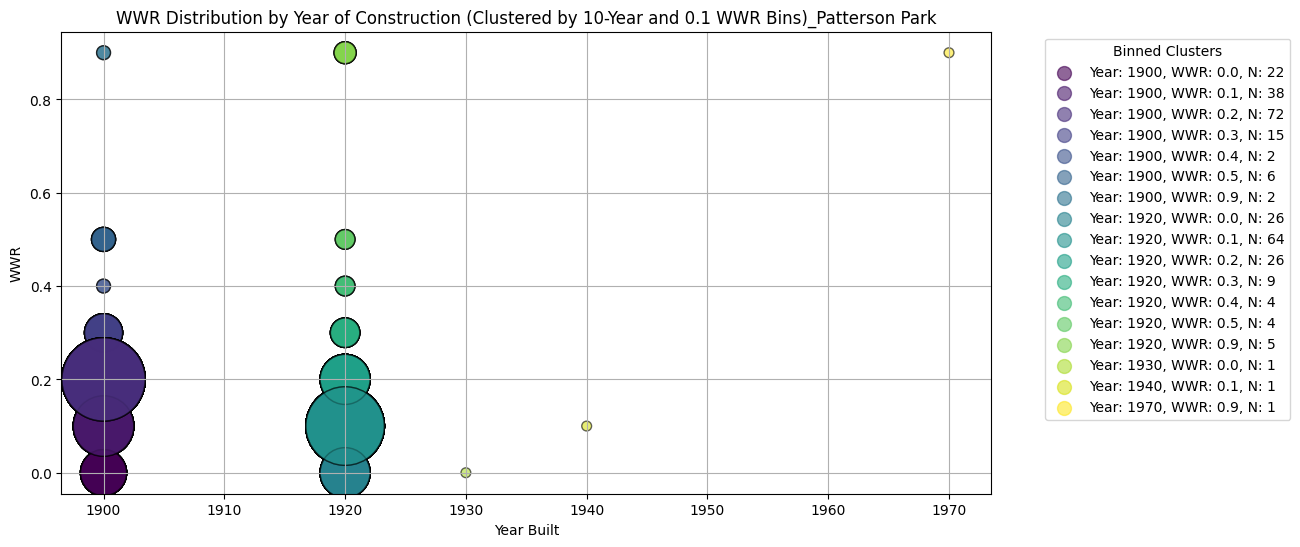

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Patterson_Park_Neighborhood.csv')

df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')
df['yearBuilt'] = pd.to_numeric(df['yearBuilt'], errors='coerce')

df = df.drop_duplicates(subset=['Address'], keep='first')

df = df.dropna(subset=['WWR', 'yearBuilt'])

df = df[df['WWR'] > 0.07]

df['Year_Bin'] = (df['yearBuilt'] // 10) * 10  # Bin years in 10-year intervals
df['WWR_Bin'] = (df['WWR'] // 0.1) * 0.1  # Bin WWR in 0.1 intervals

grouped = df.groupby(['Year_Bin', 'WWR_Bin']).size().reset_index(name='N')

df = df.merge(grouped, on=['Year_Bin', 'WWR_Bin'], how='left')

# Define bubble sizes based on bin count
df['Size'] = df['N'] * 50  # Adjust scale for better visualization

# Assign a unique color to each bin
unique_bins = grouped[['Year_Bin', 'WWR_Bin']].drop_duplicates()
num_bins = len(unique_bins)
cmap = plt.cm.get_cmap('viridis', num_bins)
bin_to_color = {tuple(bin_row): cmap(i) for i, bin_row in enumerate(unique_bins.to_records(index=False))}
df['Color'] = df.apply(lambda row: bin_to_color[(row['Year_Bin'], row['WWR_Bin'])], axis=1)

# Create the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(df['Year_Bin'], df['WWR_Bin'], s=df['Size'], c=df['Color'], alpha=0.6, edgecolors='black')

for (year_bin, wwr_bin), n in grouped.set_index(['Year_Bin', 'WWR_Bin'])['N'].items():
    color = bin_to_color[(year_bin, wwr_bin)]
    plt.scatter([], [], c=[color], alpha=0.6, s=100, label=f'Year: {int(year_bin)}, WWR: {wwr_bin:.1f}, N: {n}')

plt.xlabel('Year Built')
plt.ylabel('WWR')
plt.title('WWR Distribution by Year of Construction (Clustered by 10-Year and 0.1 WWR Bins)_Patterson Park')
plt.legend(title="Binned Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('/content/Broadway_East_Cad50smpl.csv')

df = df.dropna(subset=['Cad_WWR'])
df = df[df['Cad_WWR'] != ' ']

df['Cad_WWR'] = pd.to_numeric(df['Cad_WWR'], errors='coerce')
df['WWR'] = pd.to_numeric(df['WWR'], errors='coerce')

df = df.dropna(subset=['Cad_WWR', 'WWR'])
df = df[df['Cad_WWR'] > 0]

# Calculate residuals
df['Residual'] = df['Cad_WWR'] - df['WWR']

df_residuals_sorted = df.sort_values(by='Residual', key=abs, ascending=False)
largest_residuals = df_residuals_sorted.head(4)  # Get the rows with the 4 largest residuals
print("Addresses of buildings with the largest residuals:")
print(largest_residuals[['Address', 'Residual']])

Addresses of buildings with the largest residuals:
                                    Address  Residual
353  1812 E Federal St, Baltimore, Maryland -0.795701
358  1814 E Federal St, Baltimore, Maryland -0.765701
365  1816 E Federal St, Baltimore, Maryland -0.765701
0        1201 N Gay St, Baltimore, Maryland -0.443147


loading Roboflow workspace...
loading Roboflow project...


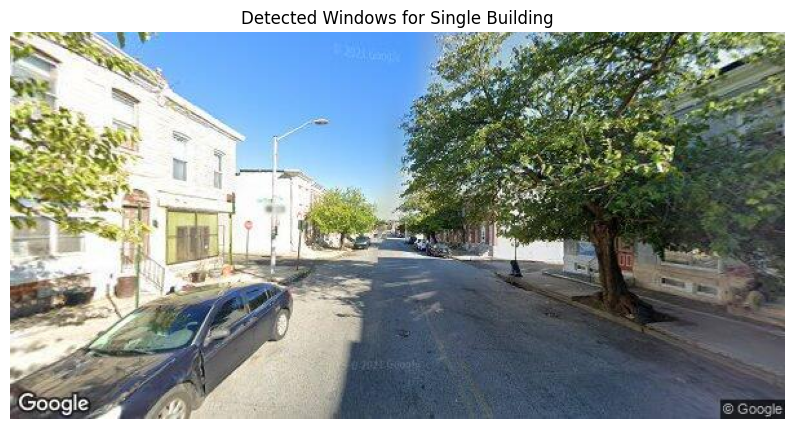

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
from roboflow import Roboflow
from pathlib import Path

# Initialize Roboflow model
rf = Roboflow(api_key="2nDoXqGj")#Replace it with your API key
project = rf.workspace().project("window-detection-xowg3")
model = project.version(1).model

# Single building image analysis from Google Drive
image_path = '/content/drive/MyDrive/Broadway/1812 E Lafayette Ave, Baltimore, Maryland.jpg'  # Path to the single building image

if os.path.exists(image_path):
    with Image.open(image_path) as image:
        # Apply the window detection model
        result = model.predict(image_path, confidence=30, overlap=30).json()

        # Draw bounding boxes on the image
        draw = ImageDraw.Draw(image)
        for prediction in result['predictions']:
            bb = prediction['x'], prediction['y'], prediction['width'], prediction['height']
            x1 = int(bb[0] - bb[2] / 2)
            y1 = int(bb[1] - bb[3] / 2)
            x2 = int(bb[0] + bb[2] / 2)
            y2 = int(bb[1] + bb[3] / 2)
            draw.rectangle([x1, y1, x2, y2], outline="blue", width=3)

        # Display the image inline using Matplotlib
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title("Detected Windows for Single Building")
        plt.axis('off')
        plt.show()
else:
    print(f"Image not found at {image_path}")



loading Roboflow workspace...
loading Roboflow project...


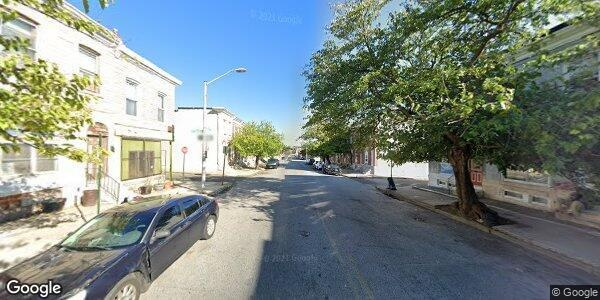

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
from PIL import Image
import pandas as pd
from roboflow import Roboflow
from IPython.display import Image as IPImage, display

# Initialize Roboflow API
rf = Roboflow(api_key="2nDoXqGj8nSW0")#Replace it with your key
project = rf.workspace().project("window-detection-xowg3")
model = project.version(1).model

file_path = '/content/drive/MyDrive/Broadway/1812 E Lafayette Ave, Baltimore, Maryland.jpg'

os.makedirs('Results', exist_ok=True)

result = model.predict(file_path, overlap=30).json()

result_save_path = os.path.join('Results', '1812_E_Lafayette_Ave_Result.jpg')
model.predict(file_path, overlap=30).save(result_save_path)

display(IPImage(result_save_path))


Removing 10% upper outliers


In [ ]:
df["Absolute_Error"] = abs(df["Cad_WWR"] - df["WWR"])

df = df.sort_values(by="Absolute_Error", ascending=False).iloc[5:].reset_index(drop=True)

mse_updated = mean_squared_error(df['Cad_WWR'], df['WWR'])
mae_updated = mean_absolute_error(df['Cad_WWR'], df['WWR'])
r2_updated = r2_score(df['Cad_WWR'], df['WWR'])

mse_updated, mae_updated, r2_updated


Calculate Mean realtive error elimianting 10%upper outliers


In [ ]:

threshold = df_clean["Relative Error"].quantile(0.90)

df_filtered = df_clean[df_clean["Relative Error"] <= threshold]

mean_relative_error_filtered = df_filtered["Relative Error"].mean()
median_relative_error_filtered = df_filtered["Relative Error"].median()

tools.display_dataframe_to_user(name="Filtered Relative Error Analysis", dataframe=df_filtered)

mean_relative_error_filtered, median_relative_error_filtered


In [ ]:
df["WWR"] = pd.to_numeric(df["WWR"], errors="coerce")
df["Cad_WWR"] = pd.to_numeric(df["Cad_WWR"], errors="coerce")

df_clean = df.dropna(subset=["WWR", "Cad_WWR"])

df_clean["Relative Error"] = abs(df_clean["Cad_WWR"] - df_clean["WWR"]) / df_clean["Cad_WWR"]

mean_relative_error = df_clean["Relative Error"].mean()
median_relative_error = df_clean["Relative Error"].median()

import ace_tools as tools
tools.display_dataframe_to_user(name="Relative Error Analysis", dataframe=df_clean)

mean_relative_error, median_relative_error


Selecting 10% of datapoints for validation

In [ ]:

import pandas as pd

file_path = "/mnt/data/Broadway_East_Cad - Broadway_East_Cad.csv"
df = pd.read_csv(file_path)

df_unique = df.drop_duplicates(subset=["Address"])

df_unique["WWR"] = pd.to_numeric(df_unique["WWR"], errors="coerce")

df_detected = df_unique.dropna(subset=["WWR"])

sample_size = int(len(df_detected) * 0.10)
df_validation_sample = df_detected.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

import ace_tools as tools
tools.display_dataframe_to_user(name="Randomly Selected Validation Sample", dataframe=df_validation_sample)

